In [13]:
#### Notebook 2019-07-30 23:37CT by Joshua Yao-Yu Lin

import torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from  torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision.models as models
import lenstronomy.Util.image_util as image_util
import os, sys
import pandas as pd
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc
import datetime
from tensorboardX import SummaryWriter

In [14]:
root_folder = "/media/joshua/HDD_fun2/time_delay_challenge/First_sims/"
train_folder = "train/"
test_folder = "test/"
train_data = pd.read_csv(root_folder + train_folder + "lens_info.csv")
test_data = pd.read_csv(root_folder + test_folder + "lens_info.csv")

EHT_test_path = root_folder + test_folder
files = os.listdir(EHT_test_path)
loaded_model_path = './saved_model/2019-07-31power_law_pred_resnet18.mdl'


if os.path.exists(loaded_model_path):
    net = torch.load(loaded_model_path)
    print('loaded mdl！')
else:
    print('No model to load. Should stop!')
    
print(os.getcwd())


normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
data_transform = transforms.Compose([
            transforms.ToTensor(), # scale to [0,1] and convert to tensor
            normalize,
            ])
target_transform = torch.Tensor

loaded mdl！
/home/joshua/Documents/git_work_zone/time_delay_challenge


In [15]:
glo_batch_size = 1
test_num_batch = 1



class DeepLenstronomyDataset(Dataset): # torch.utils.data.Dataset
    def __init__(self, root_dir, train=True, transform=None, target_transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.target_transform = target_transform
        self.train = train  # training set or test set
        self.train_folder = 'train'#'data_train'
        self.test_folder = 'test'#'data_test'
        #self.df = pd.read_csv('../input/clean-full-train/clean_full_data.csv') #+ '/clean_full_data.csv')


        if self.train:
            self.path = os.path.join(self.root_dir, self.train_folder)
            self.df = pd.read_csv(self.path + '/lens_info.csv')


            #self.length = TRAINING_SAMPLES
        else:
            self.path = os.path.join(self.root_dir, self.test_folder)
            self.df = pd.read_csv(self.path + '/lens_info.csv')
            #self.length = TESTING_SAMPLES

    def __getitem__(self, index):
        #   gamma  center_x  center_y        e1        e2  source_x  source_y  gamma_ext  psi_ext
        #print(self.df['name'].iloc[[index]])
        name = self.df['name'].iloc[[index]]
        theta_E = self.df['theta_E'].iloc[[index]]
        gamma = self.df['gamma_ext'].iloc[[index]]
        center_x = self.df['center_x'].iloc[[index]]
        center_y = self.df['center_y'].iloc[[index]]
        e1 = self.df['e1'].iloc[[index]]
        e2 = self.df['e2'].iloc[[index]]
        source_x = self.df['source_x'].iloc[[index]]
        source_y = self.df['source_y'].iloc[[index]]
        gamma_ext = self.df['gamma_ext'].iloc[[index]]
        psi_ext = self.df['psi_ext'].iloc[[index]]
        img_path = self.path + "/" + str(name.values[0]) + ".npy"
        img = np.load(img_path)
        img = scipy.ndimage.zoom(img, 224/100, order=1)
        image = np.zeros((3, 224, 224))
        for i in range(3):
            image[i, :, :] += img
        return image, theta_E.values, gamma.values, center_x.values, center_y.values, e1.values, e2.values, source_x.values, source_y.values, gamma_ext.values, psi_ext.values


    def __len__(self):
        return self.df.shape[0]
    
train_loader = torch.utils.data.DataLoader(DeepLenstronomyDataset(root_folder, train=True, transform=data_transform, target_transform=target_transform),
                    batch_size = glo_batch_size, shuffle = True
                    )

test_loader = torch.utils.data.DataLoader(DeepLenstronomyDataset(root_folder, train=False, transform=data_transform, target_transform=target_transform),
            batch_size = glo_batch_size, shuffle = True
            )

lens parameters: theta_E, e1, e2(ground trouth) 1.6221742937438277 -0.06377504263196024 0.07471901522191378
parameters: theta_E, e1, e2(prediction): 1.6198055 -0.05529591 0.06784029
source positions(ground trouth) 0.04941546454885841 -0.0110959569697636
source positions(prediction): 0.052206554 -0.007212623


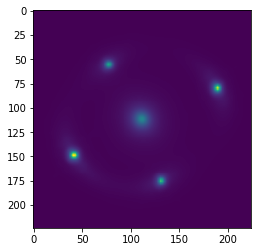

lens parameters: theta_E, e1, e2(ground trouth) 1.9911365727296308 -0.062334724350486585 0.061136815037889876
parameters: theta_E, e1, e2(prediction): 1.9879532 -0.057350364 0.055241868
source positions(ground trouth) -0.01929617214904781 -0.03867967812278142
source positions(prediction): -0.01661475 -0.030811593


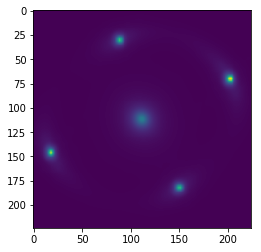

lens parameters: theta_E, e1, e2(ground trouth) 1.6429838171189453 -0.006101026899539929 -0.057551936851150835
parameters: theta_E, e1, e2(prediction): 1.6484058 -0.0022308342 -0.055190578
source positions(ground trouth) 0.01778503298867459 0.00739996947193028
source positions(prediction): 0.019010104 0.008046956


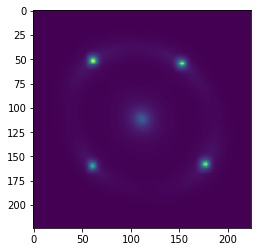

lens parameters: theta_E, e1, e2(ground trouth) 1.918453555139832 -0.05035440006567469 0.05795854593301417
parameters: theta_E, e1, e2(prediction): 1.9162958 -0.046270195 0.05335793
source positions(ground trouth) 0.028354928120575686 -0.0007399346312656138
source positions(prediction): 0.026685067 0.003741906


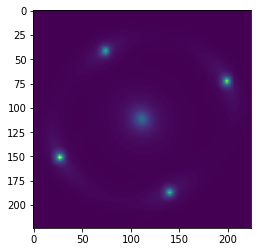

lens parameters: theta_E, e1, e2(ground trouth) 1.7004752013396536 -0.05607462853002587 0.09725060609865564
parameters: theta_E, e1, e2(prediction): 1.6930641 -0.047569167 0.08726668
source positions(ground trouth) 0.014603083103278803 0.021615013405443775
source positions(prediction): 0.022077464 0.024249911


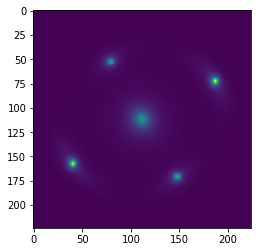

lens parameters: theta_E, e1, e2(ground trouth) 1.6561596147454734 0.02300023271603877 0.010623200596961849
parameters: theta_E, e1, e2(prediction): 1.6643231 0.024004254 0.007151069
source positions(ground trouth) -0.011720232830866387 -0.018511157183636717
source positions(prediction): -0.010165624 -0.014085724


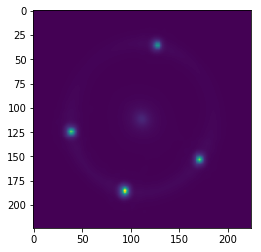

lens parameters: theta_E, e1, e2(ground trouth) 1.5479112143663378 -0.03155365645510875 0.0071560039181090655
parameters: theta_E, e1, e2(prediction): 1.5527872 -0.02657741 0.0029884
source positions(ground trouth) -0.006983037064442865 -0.04163764277458089
source positions(prediction): -0.0057760924 -0.038770452


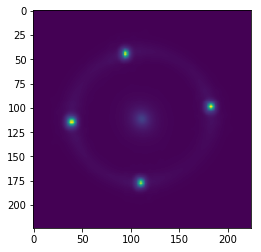

lens parameters: theta_E, e1, e2(ground trouth) 1.779975662917037 -0.01970552708727047 0.08450653910100286
parameters: theta_E, e1, e2(prediction): 1.7768651 -0.016479786 0.07518172
source positions(ground trouth) -0.02594313260371467 -0.014722594581236113
source positions(prediction): -0.024278186 -0.014581933


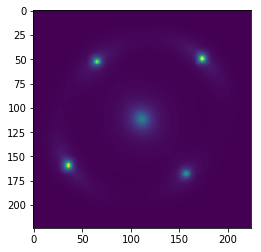

lens parameters: theta_E, e1, e2(ground trouth) 1.7448655898416512 -0.0919704647349196 -0.0061154450075768816
parameters: theta_E, e1, e2(prediction): 1.7404572 -0.08289239 -0.009955553
source positions(ground trouth) -0.04792683271561502 0.03724531581912434
source positions(prediction): -0.044707566 0.04131344


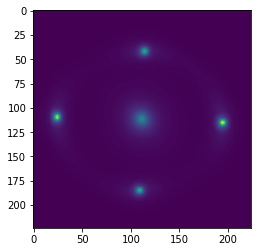

lens parameters: theta_E, e1, e2(ground trouth) 1.9353814081259348 0.040044369571161635 -0.05867446317548524
parameters: theta_E, e1, e2(prediction): 1.9243785 0.039675806 -0.05678153
source positions(ground trouth) -0.026341515468391686 -0.04957956874808531
source positions(prediction): -0.018375486 -0.04110259


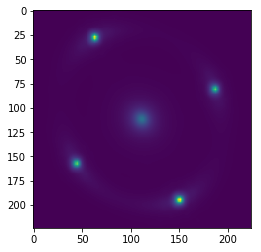

lens parameters: theta_E, e1, e2(ground trouth) 1.6635094542173212 0.03384882906145439 0.09034172352408737
parameters: theta_E, e1, e2(prediction): 1.6568329 0.036697123 0.08190388
source positions(ground trouth) -0.0023844838535129753 -0.03542042166234188
source positions(prediction): -0.003916435 -0.029569834


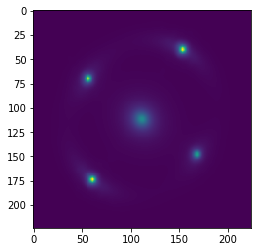

lens parameters: theta_E, e1, e2(ground trouth) 1.9537919900950709 -0.02608871483274136 0.05293112369313167
parameters: theta_E, e1, e2(prediction): 1.9499621 -0.02408963 0.048297778
source positions(ground trouth) 0.01863122903316615 -0.023978070121964304
source positions(prediction): 0.016319416 -0.016957253


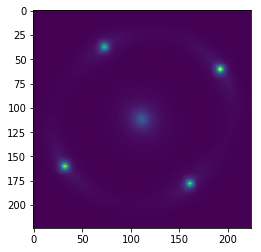

lens parameters: theta_E, e1, e2(ground trouth) 1.6441178829265453 0.05987291447743566 0.06866389730106832
parameters: theta_E, e1, e2(prediction): 1.640823 0.061353523 0.06263362
source positions(ground trouth) 0.04405718012845808 0.011934089390021456
source positions(prediction): 0.04585389 0.014068351


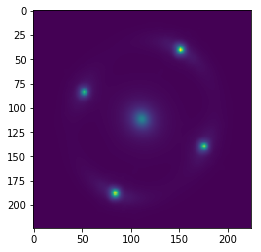

lens parameters: theta_E, e1, e2(ground trouth) 1.9891076066660616 -0.039954765833826164 0.06410031296126409
parameters: theta_E, e1, e2(prediction): 1.9860997 -0.035412665 0.05689563
source positions(ground trouth) -0.02656209237738071 0.0029988202143183327
source positions(prediction): -0.025372528 0.0061673084


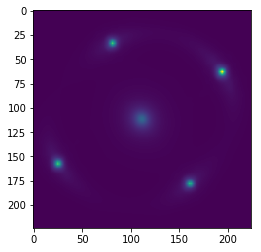

lens parameters: theta_E, e1, e2(ground trouth) 1.6269542891038045 -0.04048489656302084 0.0928184128593302
parameters: theta_E, e1, e2(prediction): 1.6210401 -0.032478508 0.0826823
source positions(ground trouth) -0.004362476740191315 0.028073164310723583
source positions(prediction): 0.003308706 0.03084971


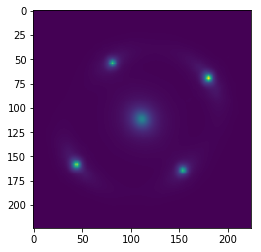

lens parameters: theta_E, e1, e2(ground trouth) 1.9562933452681317 0.013293556741557569 -0.01856984812922342
parameters: theta_E, e1, e2(prediction): 1.9530114 0.013960373 -0.02106951
source positions(ground trouth) -0.027285712443096924 0.047289834823503976
source positions(prediction): -0.015885048 0.04517384


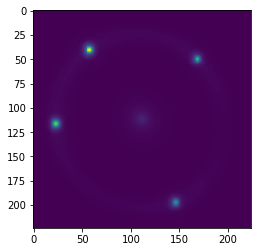

lens parameters: theta_E, e1, e2(ground trouth) 1.7298526301021018 -0.05446242350234887 -0.09297889264455723
parameters: theta_E, e1, e2(prediction): 1.7189862 -0.046722118 -0.0869488
source positions(ground trouth) 0.035242118218747995 -0.047279176567075976
source positions(prediction): 0.03864018 -0.046130493


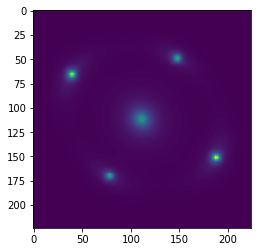

lens parameters: theta_E, e1, e2(ground trouth) 1.7805644846949895 0.011166478382779309 0.043809432443117885
parameters: theta_E, e1, e2(prediction): 1.7830756 0.015707012 0.039763838
source positions(ground trouth) 0.02627009766972592 -0.043309908064966485
source positions(prediction): 0.028692968 -0.0389221


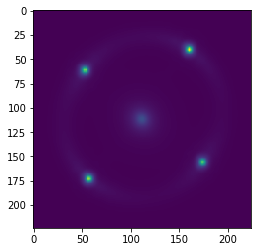

lens parameters: theta_E, e1, e2(ground trouth) 1.8004162664237031 0.020211515742901587 0.004236294448311884
parameters: theta_E, e1, e2(prediction): 1.8071686 0.02602112 0.0029493142
source positions(ground trouth) -0.029944700003406988 -0.016996818770407797
source positions(prediction): -0.02731786 -0.01078771


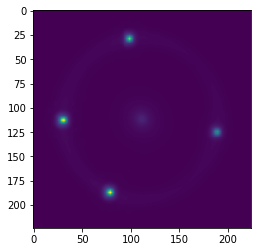

lens parameters: theta_E, e1, e2(ground trouth) 1.549080028438066 0.0859719396899471 0.010648311957674595
parameters: theta_E, e1, e2(prediction): 1.5504506 0.08574483 0.005790474
source positions(ground trouth) -0.0014256451254046829 -0.031628024793959736
source positions(prediction): -0.00071112067 -0.027254015


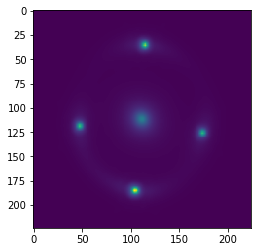

lens parameters: theta_E, e1, e2(ground trouth) 1.6454697873297477 -0.0649841305802114 -0.0746247289195329
parameters: theta_E, e1, e2(prediction): 1.640769 -0.055939067 -0.0717707
source positions(ground trouth) -0.02228476024626962 0.043888176203005384
source positions(prediction): -0.02118697 0.046470255


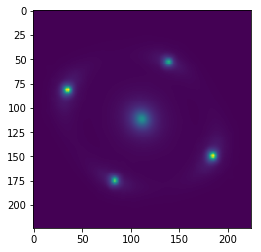

lens parameters: theta_E, e1, e2(ground trouth) 1.6460703113283175 0.053954950479415925 0.012413571601408902
parameters: theta_E, e1, e2(prediction): 1.6506121 0.056147795 0.009420143
source positions(ground trouth) 0.02792038982023701 -0.011196864375640173
source positions(prediction): 0.030599274 -0.009369447


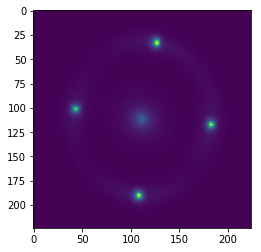

In [16]:
net.cuda()
net.eval()

for batch_idx, (data, theta_E, gamma, center_x, center_y, e1, e2, source_x, source_y, gamma_ext, psi_ext) in enumerate(test_loader):
    img = data
    data = data.float()# theta_E.float(), gamma.float(), center_x.float(), center_y.float(), e1.float(), e2.float(), source_x.float(), source_y.float(), gamma_ext.float(), psi_ext.float()
    data= Variable(data).cuda()# Variable(theta_E).cuda(), Variable(gamma).cuda(), Variable(center_x).cuda(), Variable(center_y).cuda(), Variable(e1).cuda(), Variable(e2).cuda(), Variable(source_x).cuda(), Variable(source_y).cuda(), Variable(gamma_ext).cuda(), Variable(psi_ext).cuda()


    print("lens parameters: theta_E, e1, e2(ground trouth)", theta_E.cpu().numpy()[0][0], e1.cpu().numpy()[0][0], e2.cpu().numpy()[0][0])
    output = net(data)
    print("parameters: theta_E, e1, e2(prediction):", output[0][0].detach().cpu().numpy(), output[0][4].detach().cpu().numpy(), output[0][5].detach().cpu().numpy())
    print("source positions(ground trouth)", source_x.cpu().numpy()[0][0], source_y.cpu().numpy()[0][0])
    print("source positions(prediction):", output[0][6].detach().cpu().numpy(), output[0][7].detach().cpu().numpy())
    plt.imshow(data.cpu().numpy()[0,0,:,:])
    plt.show()

    if batch_idx > 20:
        break

    
    
    
    

In [17]:
net.cuda()
net.eval()

theta_E_target_list = []
theta_E_output_list = []
e1_target_list = []
e1_output_list = []
e2_target_list = []
e2_output_list = []

source_x_target_list = []
source_x_output_list = []
source_y_target_list = []
source_y_output_list = []

for batch_idx, (data, theta_E, gamma, center_x, center_y, e1, e2, source_x, source_y, gamma_ext, psi_ext) in enumerate(test_loader):
    img = data
    data = data.float()#, theta_E.float(), gamma.float(), center_x.float(), center_y.float(), e1.float(), e2.float(), source_x.float(), source_y.float(), gamma_ext.float(), psi_ext.float()
    data= Variable(data).cuda()#Variable(theta_E).cuda(), Variable(gamma).cuda(), Variable(center_x).cuda(), Variable(center_y).cuda(), Variable(e1).cuda(), Variable(e2).cuda(), Variable(source_x).cuda(), Variable(source_y).cuda(), Variable(gamma_ext).cuda(), Variable(psi_ext).cuda()
    
    output = net(data)
    theta_E_target_list.append(theta_E.cpu().numpy()[0][0])
    e1_target_list.append(e1.cpu().numpy()[0][0])
    e2_target_list.append(e2.cpu().numpy()[0][0])
    source_x_target_list.append(source_x.cpu().numpy()[0][0])
    source_y_target_list.append(source_y.cpu().numpy()[0][0])
    
    
    theta_E_output_list.append(output[0][0].detach().cpu().numpy())
    e1_output_list.append(output[0][4].detach().cpu().numpy())
    e2_output_list.append(output[0][5].detach().cpu().numpy())
    source_x_output_list.append(output[0][6].detach().cpu().numpy())
    source_y_output_list.append(output[0][7].detach().cpu().numpy())
    
    
    if batch_idx > 1000:
        break
#     print("lens parameters: theta_E, e1, e2(ground trouth)", theta_E.cpu().numpy()[0][0], e1.cpu().numpy()[0][0], e2.cpu().numpy()[0][0])
#     output = net(data)
#     print("parameters: theta_E, e1, e2(prediction):", output[0][0].detach().cpu().numpy(), output[0][4].detach().cpu().numpy(), output[0][5].detach().cpu().numpy())
#     print("source positions(ground trouth)", source_x.cpu().numpy()[0][0], source_y.cpu().numpy()[0][0])
#     print("source positions(prediction):", output[0][6].detach().cpu().numpy(), output[0][7].detach().cpu().numpy())
#     plt.imshow(data.cpu().numpy()[0,0,:,:])
#     plt.show()

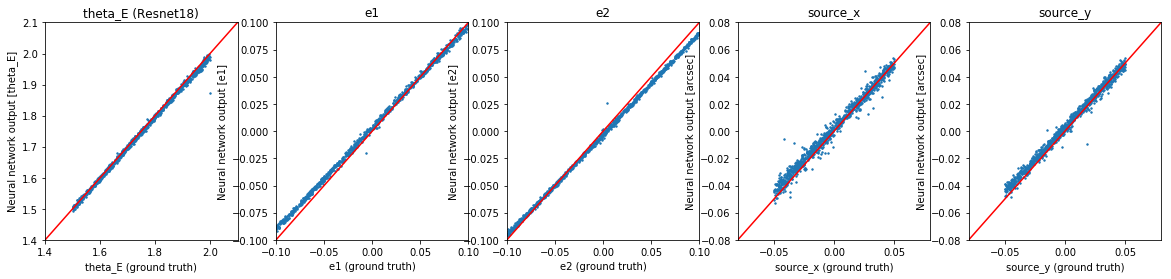

In [18]:
scale= np.linspace(1.4, 2.1 ,100)
plt.figure(figsize=(20, 4))
plt.subplot(1, 5, 1)
plt.scatter(theta_E_target_list, theta_E_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("theta_E (Resnet18)")
plt.xlim(1.4, 2.1)
plt.ylim(1.4, 2.1)
plt.xlabel("theta_E (ground truth)")
plt.ylabel("Neural network output [theta_E]")
#plt.savefig("./" + "scatter_plot.png")

scale= np.linspace(-0.1, 0.1 ,100)
#plt.figure(figsize=(4, 4))
plt.subplot(1, 5, 2)
plt.scatter(e1_target_list, e1_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("e1")
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.xlabel("e1 (ground truth)")
plt.ylabel("Neural network output [e1]")


scale= np.linspace(-0.1, 0.1 ,100)
plt.subplot(1, 5, 3)
plt.scatter(e2_target_list, e2_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("e2")
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.xlabel("e2 (ground truth)")
plt.ylabel("Neural network output [e2]")


scale= np.linspace(-0.08, 0.08 ,100)
plt.subplot(1, 5, 4)
plt.scatter(source_x_target_list, source_x_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("source_x")
plt.xlim(-0.08, 0.08)
plt.ylim(-0.08, 0.08)
plt.xlabel("source_x (ground truth)")
plt.ylabel("Neural network output [arcsec]")


scale= np.linspace(-0.08, 0.08 ,100)
plt.subplot(1, 5, 5)
plt.scatter(source_y_target_list, source_y_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("source_y")
plt.xlim(-0.08, 0.08)
plt.ylim(-0.08, 0.08)
plt.xlabel("source_y (ground truth)")
plt.ylabel("Neural network output [arcsec]")

plt.savefig("./" + loaded_model_path + "scatter_plot.png")

plt.show()